In [1]:
from sbalign.training.diffusivity import *
from torch.distributions.multivariate_normal import MultivariateNormal
import matplotlib.pyplot as plt

eigenvalues for times from tensor([0.0010]) to tensor([1]): tensor([-7.4089e-04, -1.0000e+00, -2.1147e+00, -4.4721e+00, -9.4574e+00,
        -2.0000e+01])
Gammas are tensor([[ 1.0000,  2.1147,  4.4721,  9.4574, 20.0000]])
Transition kernel of ktT is tensor([[[1.0227, 0.6386, 0.4197, 0.2227, 0.1060, 0.0496],
         [0.6386, 0.4313, 0.3058, 0.1810, 0.0946, 0.0466],
         [0.4197, 0.3058, 0.2320, 0.1506, 0.0854, 0.0442],
         [0.2227, 0.1810, 0.1506, 0.1108, 0.0708, 0.0399],
         [0.1060, 0.0946, 0.0854, 0.0708, 0.0519, 0.0330],
         [0.0496, 0.0466, 0.0442, 0.0399, 0.0330, 0.0240]]])
eigenvalues for times from 0 to tensor([1]): tensor([-7.4089e-04, -1.0000e+00, -2.1147e+00, -4.4721e+00, -9.4574e+00,
        -2.0000e+01])
Transition kernel of k0T is tensor([[[1.0237, 0.6396, 0.4208, 0.2237, 0.1070, 0.0506],
         [0.6396, 0.4323, 0.3068, 0.1820, 0.0956, 0.0476],
         [0.4208, 0.3068, 0.2330, 0.1516, 0.0864, 0.0452],
         [0.2237, 0.1820, 0.1516, 0.1118, 0.0718,

/tmp/ipykernel_39691/1809491976.py:27: UserWarning: torch.cholesky is deprecated in favor of torch.linalg.cholesky and will be removed in a future PyTorch release.
L = torch.cholesky(A)
should be replaced with
L = torch.linalg.cholesky(A)
and
U = torch.cholesky(A, upper=True)
should be replaced with
U = torch.linalg.cholesky(A).mH().
This transform will produce equivalent results for all valid (symmetric positive definite) inputs. (Triggered internally at  /opt/conda/conda-bld/pytorch_1656352657443/work/aten/src/ATen/native/BatchLinearAlgebra.cpp:1744.)
  scale_tril = torch.cholesky(cov + 1e-4 * torch.eye(cov.size(0)))


epsilson for covariance matrix: 0.01
Eigenvelus of covariance matrix: [[0.04685637+0.000000e+00j 0.01002009+5.655013e-05j
  0.01002009-5.655013e-05j 0.00998439+0.000000e+00j
  0.01000007+0.000000e+00j 0.00999998+0.000000e+00j]]
cov tensor([[[0.0217, 0.0106, 0.0096, 0.0078, 0.0049, 0.0017],
         [0.0115, 0.0204, 0.0094, 0.0077, 0.0050, 0.0019],
         [0.0092, 0.0082, 0.0175, 0.0060, 0.0038, 0.0012],
         [0.0076, 0.0068, 0.0062, 0.0150, 0.0032, 0.0011],
         [0.0048, 0.0043, 0.0039, 0.0032, 0.0121, 0.0007],
         [0.0016, 0.0014, 0.0013, 0.0011, 0.0007, 0.0102]]])
eigenvalues for times from tensor([0.0970]) to tensor([1]): tensor([-7.4089e-04, -1.0000e+00, -2.1147e+00, -4.4721e+00, -9.4574e+00,
        -2.0000e+01])
Gammas are tensor([[ 1.0000,  2.1147,  4.4721,  9.4574, 20.0000]])
Transition kernel of ktT is tensor([[[9.2435e-01, 5.4604e-01, 3.3200e-01, 1.4405e-01, 4.2748e-02,
          7.2717e-03],
         [5.4604e-01, 3.4416e-01, 2.2308e-01, 1.0671e-01, 3.4674e-02,

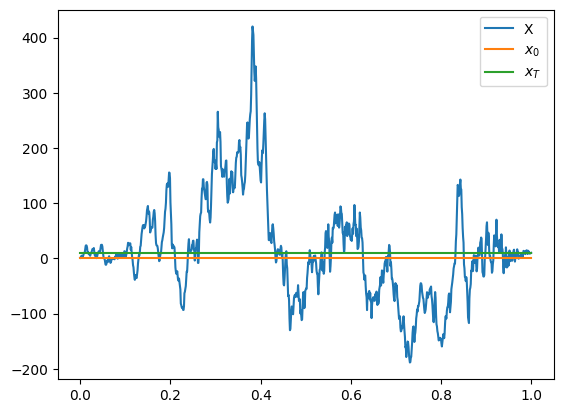

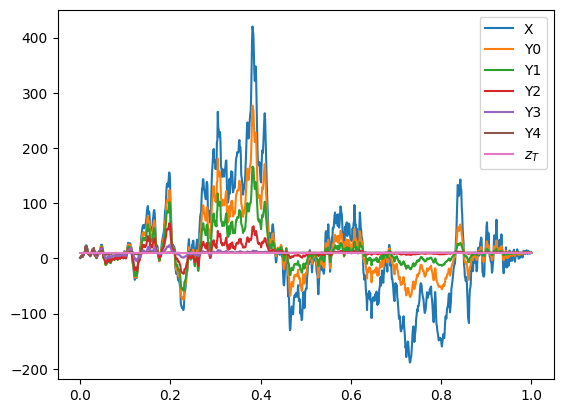

In [2]:
a = 1.0 #start value z_0 of process
b = 10.0 #end value z_T of process

# so far it only works for K<=2, where for K=2 it only works for H=>0.5 - other K and H result in non positiv definit covariance matrix
# todo: check all formulars again

H=0.5 #0.5
K=5

fbb = FBB(H=H, K=K, gamma_min=1.0,gamma_max=20)

N = 1000
T = 1.0
dt = T/N 

time = torch.linspace(0,1,N+1)
Z = torch.ones(N+1,K+1) * a
zT = torch.ones(K+1)*b

for i in range(N):
    z = Z[i]
    t = time[i+1]
    mean,cov = fbb.pinned_statistics(torch.tensor([t]),z,zT)
    #mvn = MultivariateNormal(mean,cov)  


    scale_tril = torch.cholesky(cov + 1e-4 * torch.eye(cov.size(0)))
    mvn = MultivariateNormal(mean, scale_tril=scale_tril)

    
    sample = mvn.sample(sample_shape=(1,))
    Z[i+1] = sample

plt.plot(time,Z[:,0],label='X')
plt.plot(time,(torch.ones_like(Z)*a)[:,0],label=r'$x_0$')
plt.plot(time,(torch.ones_like(Z)*b)[:,0],label=r'$x_T$')
plt.legend()
plt.show()
plt.close()

plt.plot(time,Z[:,0],label='X')
for k in range(K):
    plt.plot(time,Z[:,k+1], label=f'Y{k}')
plt.plot(time,(torch.ones_like(Z)*b)[:,0],label=r'$z_T$')
plt.legend()
plt.show()
plt.close()